In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
from joblib import Parallel, delayed
import multiprocessing
import datetime
import statsmodels.api as sm
import seaborn
from sklearn.metrics import classification_report
import talib as ta
import time
import scipy
import os

from scipy import stats

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

**新建商品住宅销售价格指数 - 月度环比数据**  
数据来源：  
直辖市、省会城市、自治区首府城市（不含拉萨市）、计划单列市以及部分地级市等53个城市，使用房地产管理部门的网签数据。  
含义:  
综合反映住宅商品价格水平总体变化趋势和变化幅度的相对数。

In [2]:
def PlotF(size,x,y,fontsize,xlabel,ylabel,title,line=False):
    plt.figure(figsize=size)
    plt.plot(x,y)
    if line:
        plt.plot(x,[0 for i in y],ls='--')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.title(title,fontsize=fontsize)
    plt.tick_params(labelsize=20)
    plt.show()
def BarF(size,x,y,fontsize,width,xlabel,ylabel,title):
    plt.figure(figsize=size)
    plt.bar(x,y,width=width)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.title(title,fontsize=fontsize)
    plt.tick_params(labelsize=20)
    plt.show()
def ScatterF(size,x,y,fontsize,xlabel,ylabel,title):
    plt.figure(figsize=size)
    plt.scatter(x,y)
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.title(title,fontsize=fontsize)
    plt.tick_params(labelsize=20)
    plt.show()

# 基本数据处理 123线

In [3]:
data_list = os.listdir('D:/CodeL/其他/city_data')

In [4]:
L0 = []
L1 = ['上海','北京','深圳','广州','成都','杭州','重庆','武汉','苏州','西安','天津','南京','郑州','长沙','沈阳','青岛','宁波','东莞','无锡']
L2 = ['大连','厦门','福州','无锡','合肥','昆明','哈尔滨','济南','佛山','长春','温州','石家庄','南宁','常州','泉州','南昌','贵阳','太原','烟台','嘉兴','南通','金华','珠海','惠州','徐州','海口','乌鲁木齐','绍兴','中山','台州','兰州']
L3 = ['韶关','锦州','遵义','牡丹江','泸州','平顶山','常德','安庆','北海','大理','潍坊','保定','镇江','扬州','桂林','唐山','三亚','湖州','呼和浩特','廊坊','洛阳','威海','盐城','临沂','江门','汕头','泰州','漳州','邯郸','济宁','芜湖','淄博','银川','柳州','绵阳','湛江','鞍山','赣州','大庆','宜昌','包头','咸阳','秦皇岛','株洲','莆田','吉林','淮安','肇庆','宁德','衡阳','南平','连云港','丹东','丽江','揭阳','延边朝鲜族自治州','舟山','九江','龙岩','沧州','抚顺','襄阳','上饶','营口','三明','蚌埠','丽水','岳阳','清远','荆州','泰安','衢州','盘锦','东营','南阳','马鞍山','南充','西宁','孝感','齐齐哈尔']

In [5]:
LL0 = ['上海','北京','深圳','广州']
LL1 = ['成都','杭州','重庆','武汉','苏州','西安','天津','南京','郑州','长沙','沈阳','青岛','宁波','东莞','无锡']
LL2 = ['大连','厦门','福州','无锡','合肥','昆明','哈尔滨','济南','佛山','长春','温州','石家庄','南宁','常州','泉州','南昌','贵阳','太原','烟台','嘉兴','南通','金华','珠海','惠州','徐州','海口','乌鲁木齐','绍兴','中山','台州','兰州']
LL3 = ['韶关','锦州','遵义','牡丹江','泸州','平顶山','常德','安庆','北海','大理','潍坊','保定','镇江','扬州','桂林','唐山','三亚','湖州','呼和浩特','廊坊','洛阳','威海','盐城','临沂','江门','汕头','泰州','漳州','邯郸','济宁','芜湖','淄博','银川','柳州','绵阳','湛江','鞍山','赣州','大庆','宜昌','包头','咸阳','秦皇岛','株洲','莆田','吉林','淮安','肇庆','宁德','衡阳','南平','连云港','丹东','丽江','揭阳','延边朝鲜族自治州','舟山','九江','龙岩','沧州','抚顺','襄阳','上饶','营口','三明','蚌埠','丽水','岳阳','清远','荆州','泰安','衢州','盘锦','东营','南阳','马鞍山','南充','西宁','孝感','齐齐哈尔']

In [6]:
data_all = pd.DataFrame()
for each in data_list:
    each_df = pd.read_csv('city_data/%s'%(each),encoding='gb2312',skiprows=3,nrows=1).rename(columns={'指标':'日期'})
    each_df_ = each_df.set_index('日期').T
    each_df_['城市'] = each[:-4]
    
    if each[:-4] in L0:
        level = 0
    elif each[:-4] in L1:
        level = 1
    elif each[:-4] in L2:
        level = 2
    elif each[:-4] in L3:
        level = 3
    else:
        level =np.nan
        
    if each[:-4] in LL0:
        level2 = 0
    elif each[:-4] in LL1:
        level2 = 1
    elif each[:-4] in LL2:
        level2 = 2
    elif each[:-4] in LL3:
        level2 = 3
    else:
        level =np.nan
    each_df_['类别123'] = level
    each_df_['类别0123'] = level2
    data_all = pd.concat([data_all,each_df_],axis=0)

In [7]:
import re
data_all_ = data_all.dropna().reset_index().rename(columns={'index':'日期'})
data_all_['date'] = data_all_['日期'].apply(lambda x: datetime.datetime.strptime((x[:4]+'-'+re.findall('年(.*?)月',x)[0].zfill(2)+'-01'),'%Y-%m-%d') )
data_all_.to_csv('city_hpdata.csv',encoding = 'gb2312',index=False)

In [13]:
for name,df in data_all_.groupby('类别123'):
    print(df['城市'].unique())

['上海' '北京' '南京' '天津' '宁波' '广州' '成都' '无锡' '杭州' '武汉' '沈阳' '深圳' '西安' '郑州'
 '重庆' '长沙' '青岛']
['乌鲁木齐' '兰州' '南宁' '南昌' '厦门' '合肥' '哈尔滨' '大连' '太原' '徐州' '惠州' '昆明' '泉州' '济南'
 '海口' '温州' '烟台' '石家庄' '福州' '贵阳' '金华' '长春']
['三亚' '丹东' '九江' '包头' '北海' '南充' '吉林' '呼和浩特' '唐山' '大理' '安庆' '宜昌' '岳阳' '常德'
 '平顶山' '扬州' '桂林' '泸州' '洛阳' '济宁' '湛江' '牡丹江' '秦皇岛' '蚌埠' '襄阳' '西宁' '赣州' '遵义'
 '银川' '锦州' '韶关']


array(['上海', '北京', '南京', '天津', '宁波', '广州', '成都', '无锡', '杭州', '武汉', '沈阳',
       '深圳', '西安', '郑州', '重庆', '长沙', '青岛'], dtype=object)

# 划分一二三线城市加以研究的缘由

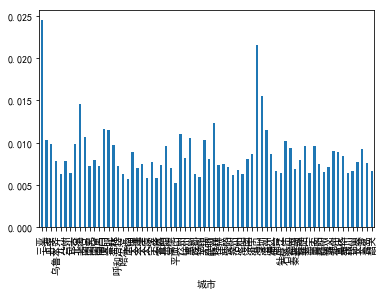

In [931]:
data_all_.groupby('城市')['销售价格变动'].std().plot.bar()

In [932]:
city_corr = data_all_.pivot(index='date',columns='城市',values='销售价格变动').corr()

sort_data_all = data_all_.sort_values(['类别123','城市'])
uicityList = sort_data_all['城市'].unique()
sort_city_corr = city_corr.loc[uicityList,uicityList]

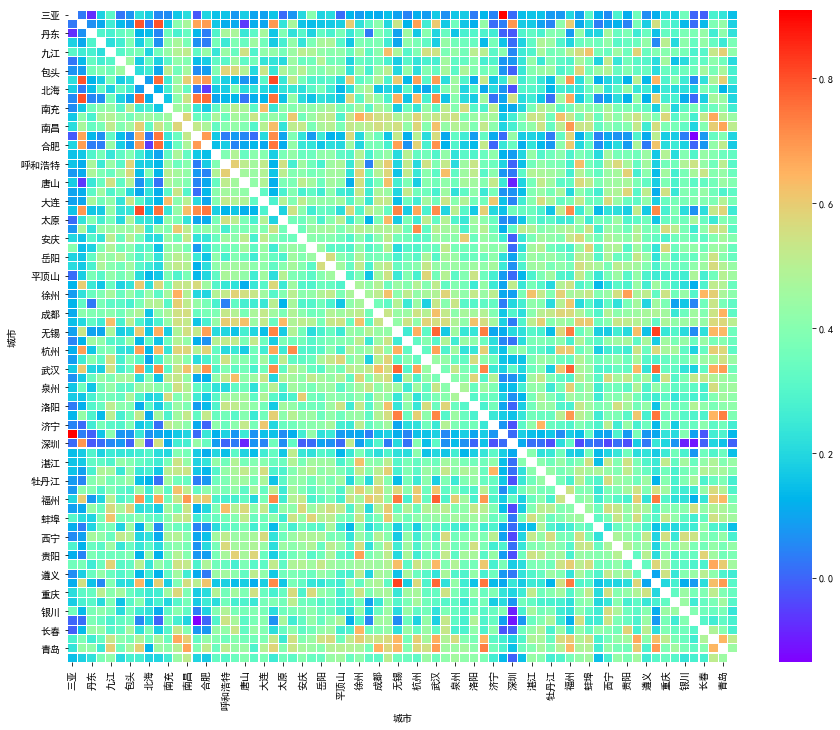

In [923]:
plt.figure(figsize=(15,12))
seaborn.heatmap(city_corr.replace(1,np.nan),linewidths=0.05,linecolor='white',annot_kws={'size':8,'weight':'bold'},cmap='rainbow')

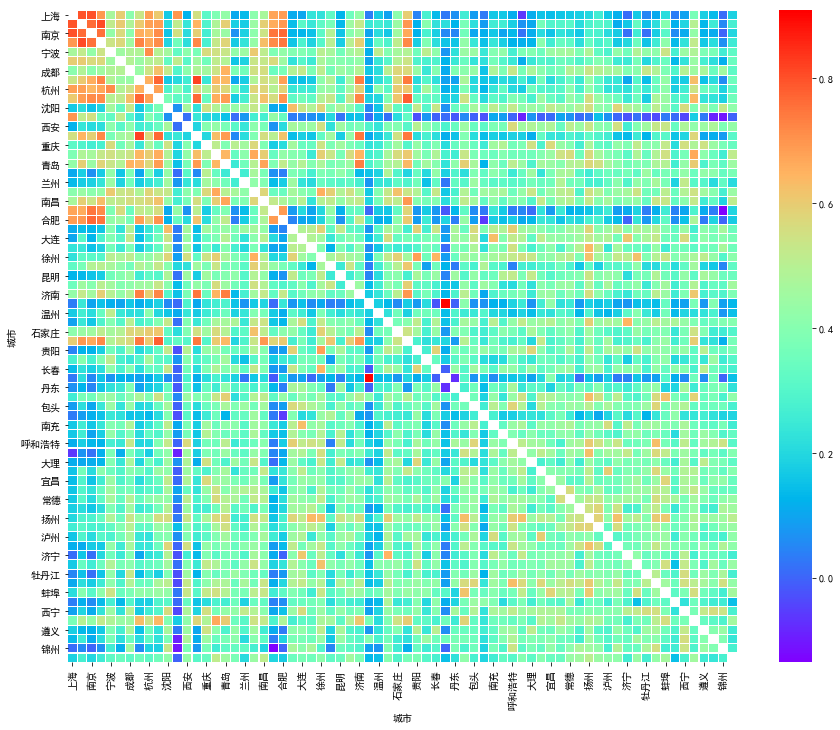

In [921]:
plt.figure(figsize=(15,12))
seaborn.heatmap(sort_city_corr.replace(1,np.nan),linewidths=0.05,linecolor='white',annot_kws={'size':8,'weight':'bold'},cmap='rainbow')

# 累积价格变动

In [238]:
data_all_ = pd.read_csv('city_hpdata.csv',encoding = 'gb2312',parse_dates=['date'])

In [239]:
data_all_.dtypes

日期                              object
新建商品住宅销售价格指数(上月=100)           float64
城市                              object
类别123                            int64
类别0123                           int64
date                    datetime64[ns]
dtype: object

In [242]:
data_all_['销售价格变动'] = data_all_['新建商品住宅销售价格指数(上月=100)']/100 - 1
data_all_hp = (data_all_.pivot_table(index='date',columns='城市',values='销售价格变动')+1).cumprod().stack().to_frame('hp').reset_index()
hpData = data_all_.merge(data_all_hp,on=['date','城市'])

In [243]:
hpData.to_csv('hpData.csv',encoding = 'gb2312',index=False)

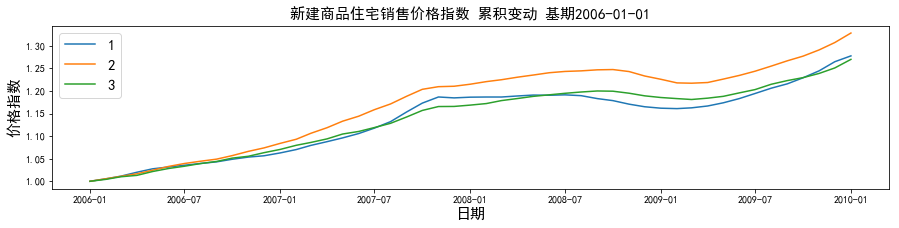

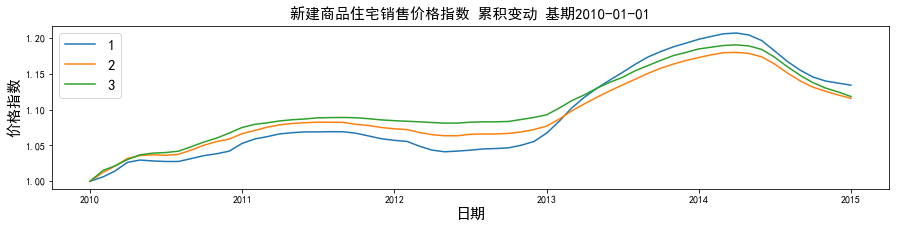

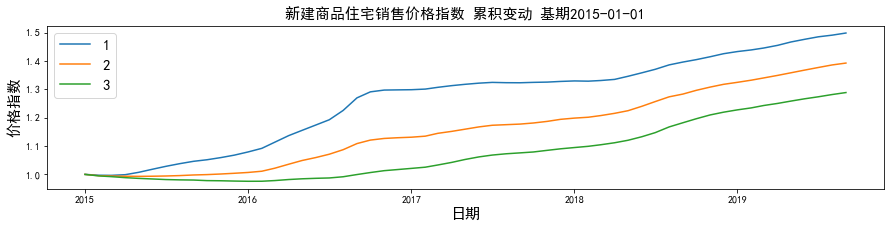

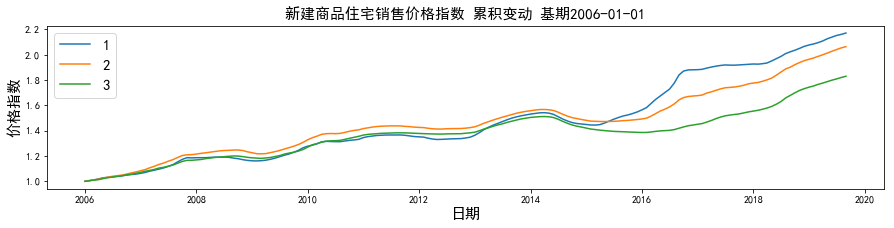

In [443]:
# 分年度累积变动 绘图
def PlotYear(hpData,start,end):
    hpData_ = hpData[(hpData['date']>=start) & (hpData['date']<=end)].copy()
#     for kind in ['类别123','类别0123']:
    for kind in ['类别123']:
        L123Data = hpData_.groupby(['date',kind],as_index=False).mean().pivot_table(index='date',columns=kind,values='hp')
        L123Data_ = L123Data.div(L123Data.iloc[0,:],axis=1)
        plt.figure(figsize=(15,3))
        plt.plot(L123Data_)
        plt.xlabel('日期',fontsize=15)
        plt.ylabel('价格指数',fontsize=15)
        plt.title('新建商品住宅销售价格指数 累积变动 基期%s'%(start),fontsize=15)
        plt.legend(L123Data_.columns,fontsize=15)
        plt.show()

PlotYear(hpData,'2006-01-01','2010-01-01')
PlotYear(hpData,'2010-01-01','2015-01-01')
PlotYear(hpData,'2015-01-01','2020-01-01')
PlotYear(hpData,'2006-01-01','2020-01-01')

# 一二三线城市新建商品住宅销售价格年度涨幅

In [948]:
# 一二三线城市新建商品住宅销售价格年度涨幅
def YearRet(df):    
    df_ = df.copy()
    result = (df_.div(df_.iloc[0,:],axis=1).iloc[-1,:]-1).to_frame().T[[1,2,3]]
    return result

L123Data = hpData.groupby(['date','类别123'],as_index=False).mean().pivot_table(index='date',columns='类别123',values='hp')
L123Data['year'] = L123Data.reset_index()['date'].apply(lambda x: x.year).values

YearRetData = L123Data.groupby('year').apply(YearRet)
YearRetData.index = YearRetData.index.droplevel(1)
YearRetData.T.to_csv('YearCum.csv',encoding='gb2312')
YearRetData.T

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
类别123,,,,,,,,,,,,,,
1,0.056462,0.114723,-0.017882,0.088568,0.042090,0.006181,-0.001637,0.117688,-0.051106,0.067812,0.202907,0.022488,0.072221,0.045604
2,0.073881,0.116730,0.014965,0.066354,0.058882,0.008122,-0.001040,0.085062,-0.044613,0.003924,0.121631,0.055705,0.099417,0.051265
3,0.063329,0.088943,0.017568,0.055218,0.067332,0.009825,0.004110,0.079687,-0.050652,-0.023503,0.042381,0.067612,0.113921,0.049723


# 各城市新建商品住宅销售价格变动幅度 - 可以展示top10

In [550]:
# 各城市新建商品住宅销售价格变动幅度 - 可以展示top10
def CityPctF(hpData,start,end):
    hpDataSub = hpData[(hpData['date']>=start) & (hpData['date']<=end)].copy()
    CityPct = hpDataSub.groupby('城市').mean().sort_values('销售价格变动',ascending=False)[['销售价格变动']].rename(columns={'销售价格变动':'%s起新建商品住宅销售价格变动'%(start[:4])})
    return CityPct
CityPctDf = pd.concat([CityPctF(hpData,'2006-01-01','2020-01-01'),
           CityPctF(hpData,'2010-01-01','2020-01-01'),
           CityPctF(hpData,'2015-01-01','2020-01-01')],axis=1,sort=True)
CityPctDf

,2006起新建商品住宅销售价格变动,2010起新建商品住宅销售价格变动,2015起新建商品住宅销售价格变动
三亚,0.006127,0.006000,0.004754
上海,0.004933,0.005607,0.008281
丹东,0.002703,0.002923,0.003526
乌鲁木齐,0.004812,0.003179,0.002632
九江,0.003527,0.003547,0.005509
兰州,0.004042,0.003162,0.003544
包头,0.002630,0.002231,0.002912
北京,0.006327,0.005829,0.007018
北海,0.005467,0.003897,0.005772
南京,0.004879,0.005282,0.008105


# 描述性统计&ADF平稳性检验

In [890]:
# 描述性统计 ADF test
def ADF_test(df):
    df_ =df.sort_values('date')
    adf_test = adfuller(df_['销售价格变动'])
    mean_ = df_['销售价格变动'].mean()
    std_ = df_['销售价格变动'].std()
    max_ = df_['销售价格变动'].max()
    min_ = df_['销售价格变动'].min()
    median_ = df_['销售价格变动'].median()
    result = pd.DataFrame({'mean_':[mean_],
                           'std_':[std_],
                           'max_':[max_],
                           'min_':[min_],
                           'median_':[median_],
                           't_value':[adf_test[0]],
                           'ADFpvalue_001':[adf_test[1]]})
    return result
hpDataTier = hpData.groupby(['date','类别123'],as_index=False).mean()
adf_hp = hpDataTier.groupby('类别123').apply(ADF_test)
adf_hp.index = adf_hp.index.droplevel(1)

In [891]:
# 读取股票月度数据
spDataForDes = pd.read_csv('szzz_m.csv')
spDataForDes['Ret'] = spDataForDes['涨跌幅(%)']/100
adf_sp = pd.DataFrame({'mean_':[spDataForDes['Ret'].mean()],
'std_':[spDataForDes['Ret'].std()],
'max_':[spDataForDes['Ret'].max()],
'min_':[spDataForDes['Ret'].min()],
'median_':[spDataForDes['Ret'].median()],
't_value':[adfuller(spDataForDes['Ret'])[0]],
'ADFpvalue_001':[adfuller(spDataForDes['Ret'])[1]],
},index=['上证综指收益率'])
pd.concat([adf_hp,adf_sp],axis=0)

,mean_,std_,max_,min_,median_,t_value,ADFpvalue_001
1,0.004733,0.006695,0.036059,-0.012588,0.004176,-3.647966,0.004908
2,0.004389,0.005228,0.018682,-0.010773,0.004773,-3.607425,0.005621
3,0.003675,0.004815,0.017548,-0.011516,0.004000,-3.040824,0.031254
上证综指收益率,0.006136,0.075526,0.274500,-0.246300,0.006600,-5.329010,0.000005


In [552]:
# 平均涨幅
def computeAvg(df,start_y,end_y,col):
    df = df.sort_values('date').copy()
    df_ = df[(df['date']>=start_y) & (df['date']<=end_y)].copy()
    colcum = df_[col].tolist()[-1]/df_[col].tolist()[0] - 1
    result = pd.DataFrame({'avg_%s %s_to_%s'%(col,start_y,end_y):[colcum],})
    return result

start_y = '2018-01-01'
end_y = '2019-01-01'
col = 'hp'
Y_avg_hp = hpData.groupby(['城市']).apply(computeAvg,start_y,end_y,col)
Y_avg_hp.index = Y_avg_hp.index.droplevel(1)
Y_avg_hp

,avg_hp 2018-01-01_to_2019-01-01
城市,
三亚,0.144859
上海,0.009001
丹东,0.175377
乌鲁木齐,0.095870
九江,0.099151
兰州,0.112316
包头,0.109908
北京,0.028294
北海,0.126501


# SVAR 检验效应与确定模型

## SVAR pvalue

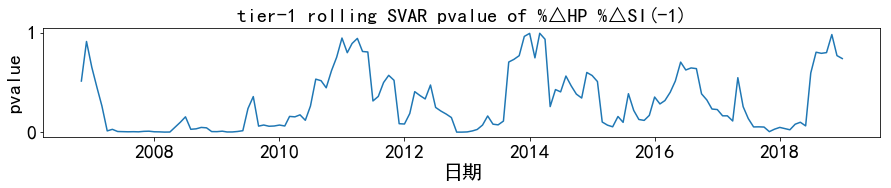

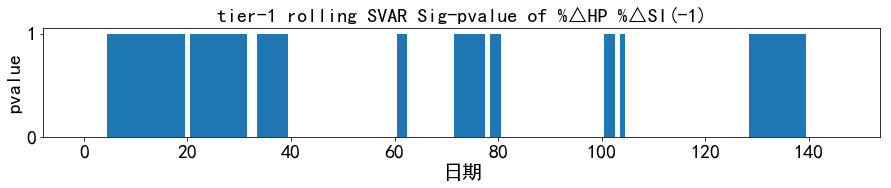

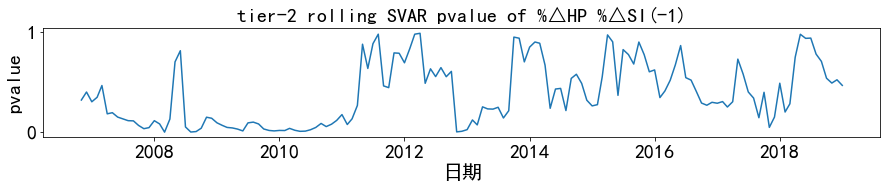

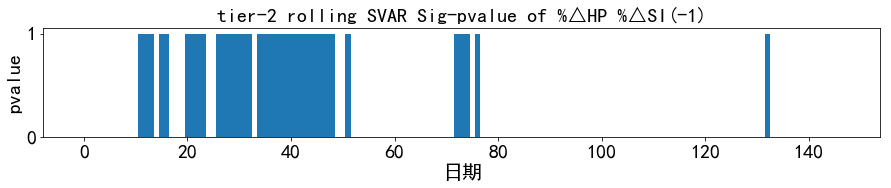

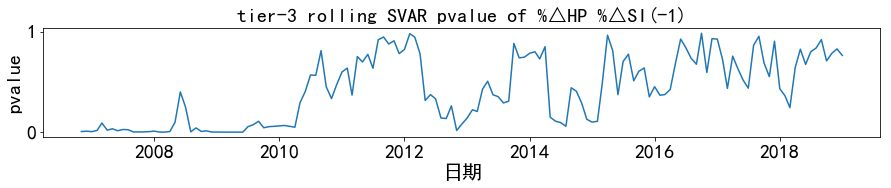

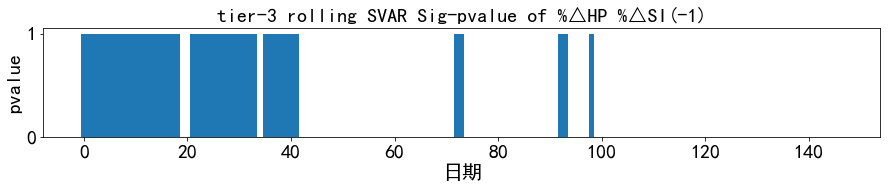

In [952]:
# SVAR p-value
tier = 1
col_name = {'HP-SZ(-1)-p':'%△HP %△SI(-1)',
            'HP-SZ(-2)-p':'房价% 上证%(-2)',
            'SZ-HP(-1)-p':'上证% 房价%(-1)',
            'SZ-HP(-2)-p':'上证% 房价%(-2)'}
for tier in [1,2,3]:
    SVAR1 = pd.read_csv('WindowSVAR_Type%s.csv'%(str(tier)),index_col=0,parse_dates=['StartDate','EndDate','Date'])
#     for col in ['HP-SZ(-1)-p','HP-SZ(-2)-p','SZ-HP(-1)-p','SZ-HP(-2)-p']:
    for col in ['HP-SZ(-1)-p']:
        PlotF((15,2),SVAR1['Date'],SVAR1[col],20,'日期','pvalue','tier-%s rolling SVAR pvalue of %s'%(tier,col_name[col]))
        ifSigSS=SVAR1[col].apply(lambda x: 1 if x<0.1 else 0)
        BarF((15,2),ifSigSS.index,ifSigSS.values,20,1,'日期','pvalue','tier-%s rolling SVAR Sig-pvalue of %s'%(tier,col_name[col]))
    print('\n')

## SVAR coef

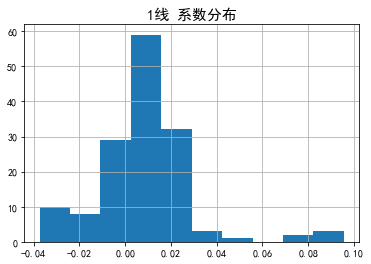

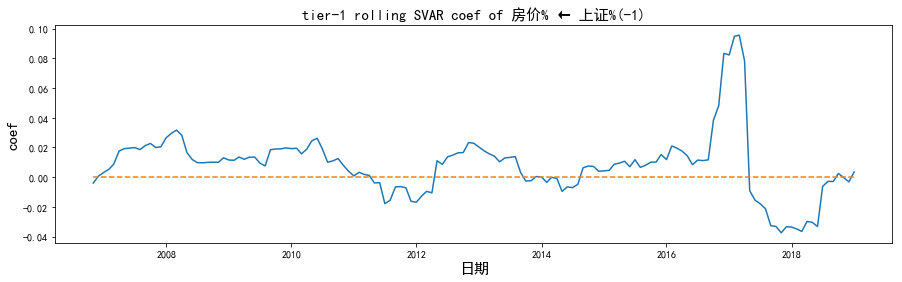

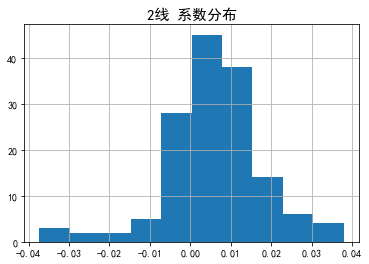

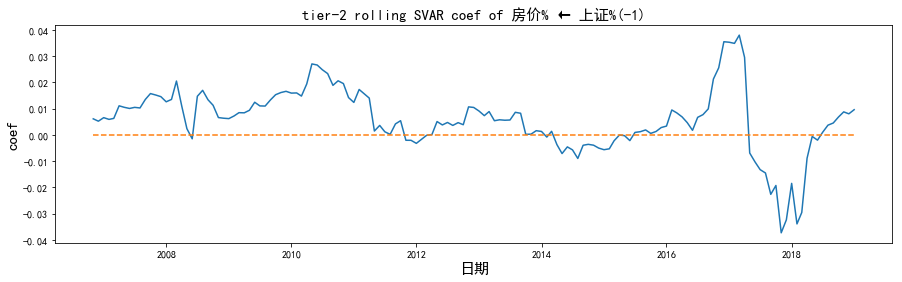

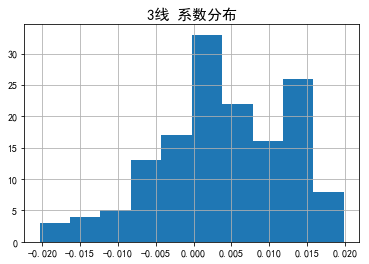

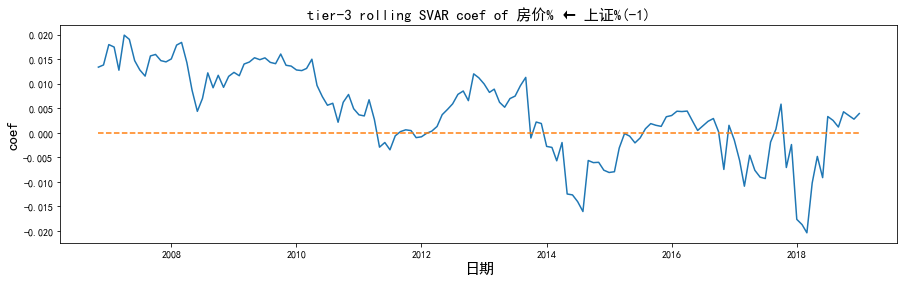

In [938]:
# SVAR coef
tier = 1
col_name = {'HP-SZ(-1)':'房价% ← 上证%(-1)',
            'HP-SZ(-2)':'房价% ← 上证%(-2)',
            'SZ-HP(-1)':'上证% ← 房价%(-1)',
            'SZ-HP(-2)':'上证% ← 房价%(-2)',
            'A':'上证% ← 房价%(0)'}
for tier in [1,2,3]:
    SVAR1 = pd.read_csv('WindowSVAR_Type%s.csv'%(str(tier)),index_col=0,parse_dates=['StartDate','EndDate','Date'])
    SVAR1['A'] = -SVAR1['A']
    plt.title('%s线 系数分布'%(tier),fontsize=15)
    SVAR1['HP-SZ(-1)'].hist(bins=10)
#     for col in ['HP-SZ(-1)','HP-SZ(-2)','SZ-HP(-1)','SZ-HP(-1)','A']:
    for col in ['HP-SZ(-1)']:
        PlotF((15,4),SVAR1['Date'],SVAR1[col],15,'日期','coef','tier-%s rolling SVAR coef of %s'%(tier,col_name[col]),line=True)
    
    print('\n')

**股价变动增加1个百分点,下期房价变动增加k个百分点**

# OLS hp-sz(-1) 确定单方程模型

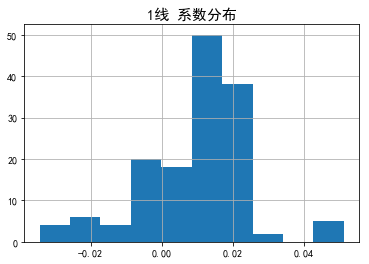

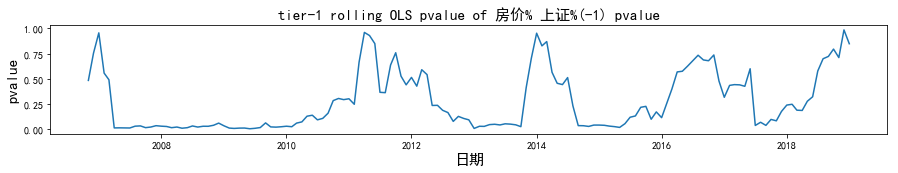

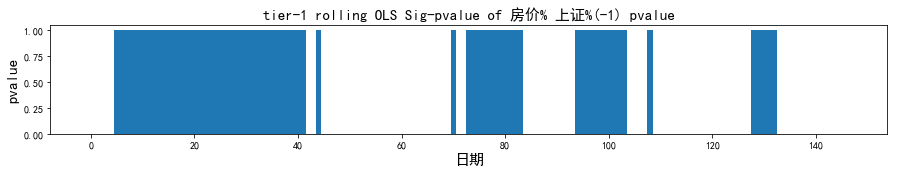

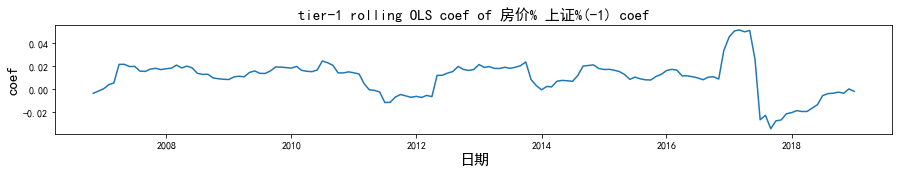

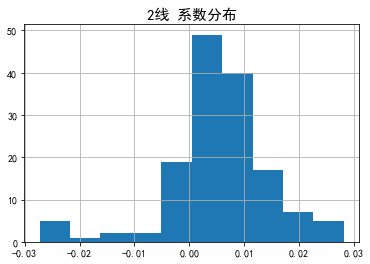

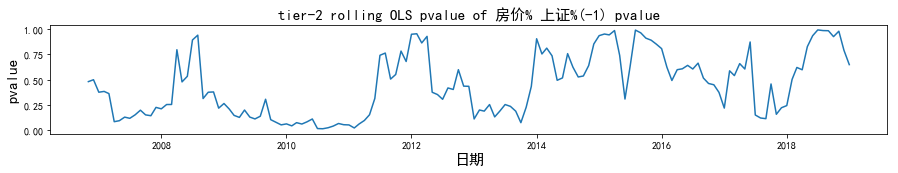

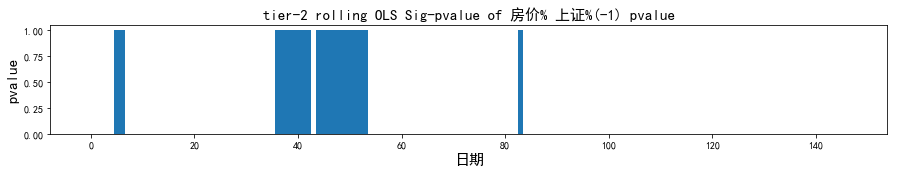

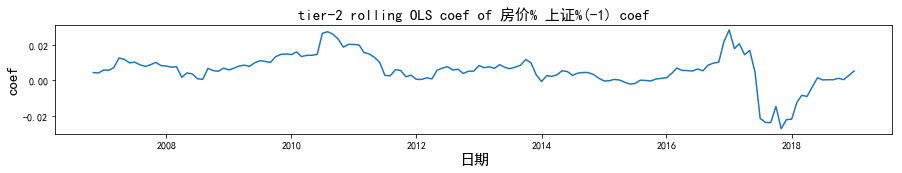

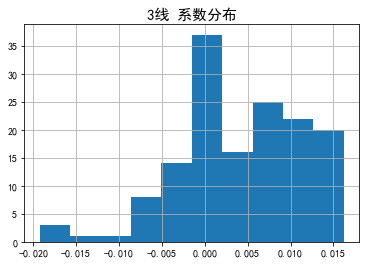

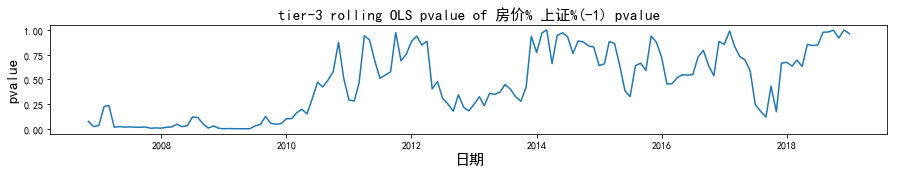

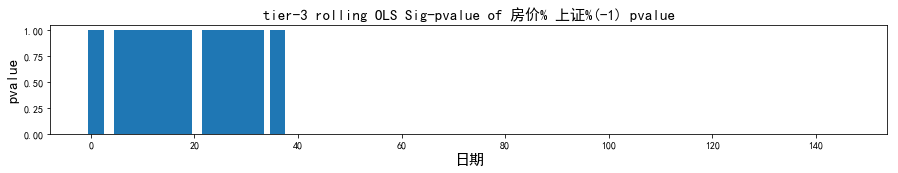

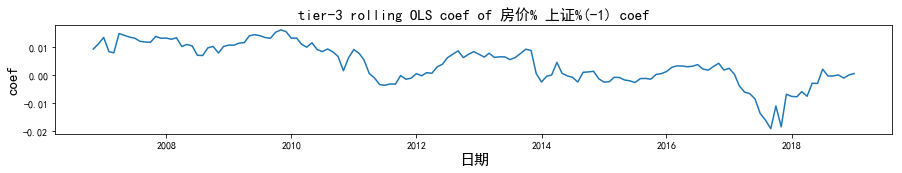

In [934]:
# OLS p-value and coef
tier = 1
col_name = {'szgrowth(-1)-p':'房价% 上证%(-1) pvalue',
            'szgrowth(-1)':'房价% 上证%(-1) coef',
           }
for tier in [1,2,3]:
    OLS1 = pd.read_csv('WindowOLS2\'_Type%s.csv'%(str(tier)),index_col=0,parse_dates=['StartDate','EndDate','Date'])
    plt.title('%s线 系数分布'%(tier),fontsize=15)
    OLS1['szgrowth(-1)'].hist(bins=10)
#     for col in ['HP-SZ(-1)-p','HP-SZ(-2)-p','HP-HP(-1)-p','HP-HP(-2)-p']:
    for col in ['szgrowth(-1)-p']:
        PlotF((15,2),OLS1['Date'],OLS1[col],15,'日期','pvalue','tier-%s rolling OLS pvalue of %s'%(tier,col_name[col]))
        ifSigSS=OLS1[col].apply(lambda x: 1 if x<0.1 else 0)
        BarF((15,2),ifSigSS.index,ifSigSS.values,15,1,'日期','pvalue','tier-%s rolling OLS Sig-pvalue of %s'%(tier,col_name[col]))
    PlotF((15,2),OLS1['Date'],OLS1['szgrowth(-1)'],15,'日期','coef','tier-%s rolling OLS coef of %s'%(tier,col_name['szgrowth(-1)']))
    print('\n')

In [933]:
OLS1

,StartDate,EndDate,Date,const,szgrowth(-1)+,szgrowth(-1),hpgrowth(-1),const-p,szgrowth(-1)+p,szgrowth(-1)p,hpgrowth(-1)-p,rsquared,rsquared_adj
0,2006-02-01,2007-07-01,2006-11-01,0.569836,0.046575,-0.032002,-0.138811,0.000899,0.074525,0.166349,5.211877e-01,0.368538,0.233225
1,2006-03-01,2007-08-01,2006-12-01,0.642975,0.043771,-0.027946,-0.240573,0.000328,0.073068,0.196755,2.682872e-01,0.452613,0.335316
2,2006-04-01,2007-09-01,2007-01-01,0.546320,0.050521,-0.031706,-0.086914,0.013368,0.126583,0.282793,7.651195e-01,0.383537,0.251438
3,2006-05-01,2007-10-01,2007-02-01,0.328413,0.043918,-0.030469,0.378144,0.139808,0.278105,0.399378,1.758889e-01,0.263207,0.105322
4,2006-06-01,2007-11-01,2007-03-01,0.270713,0.050169,-0.036520,0.423873,0.205725,0.207811,0.305014,9.360492e-02,0.308651,0.160504
5,2006-07-01,2007-12-01,2007-04-01,0.437181,-0.014583,0.024955,0.286670,0.049395,0.459971,0.104428,2.662244e-01,0.402448,0.274401
6,2006-08-01,2008-01-01,2007-05-01,0.363477,-0.016432,0.025410,0.404499,0.056774,0.423934,0.105777,7.379740e-02,0.439139,0.318955
7,2006-09-01,2008-02-01,2007-06-01,0.366608,-0.008778,0.018926,0.375061,0.067135,0.642101,0.147925,9.270206e-02,0.467101,0.352909
8,2006-10-01,2008-03-01,2007-07-01,0.422259,-0.013524,0.021497,0.347664,0.024928,0.461121,0.096066,9.851419e-02,0.473340,0.360484
9,2006-11-01,2008-04-01,2007-08-01,0.393736,-0.007202,0.016091,0.363622,0.045028,0.674937,0.143216,9.421606e-02,0.480167,0.368775


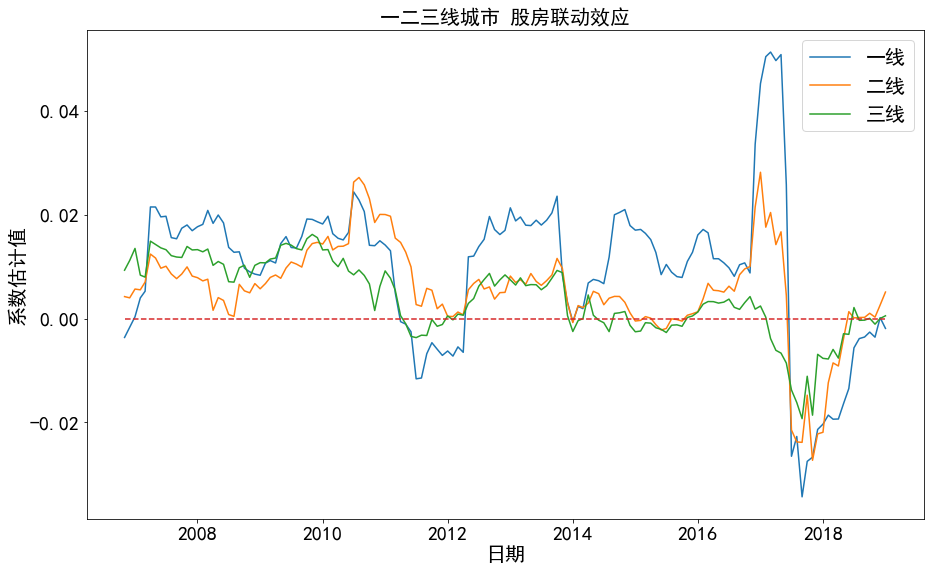

In [944]:
fontsize = 20
size = (15,9)
xlabel = '日期'
ylabel = '系数估计值'
title = '一二三线城市 股房联动效应'
plt.figure(figsize=size)
for tier in [1,2,3]:
    OLS1 = pd.read_csv('WindowOLS2\'_Type%s.csv'%(str(tier)),index_col=0,parse_dates=['StartDate','EndDate','Date'])
    plt.plot(OLS1['Date'],OLS1['szgrowth(-1)'])
plt.plot(OLS1['Date'],[0 for i in OLS1['szgrowth(-1)']],ls='--')
plt.xlabel(xlabel,fontsize=fontsize)
plt.ylabel(ylabel,fontsize=fontsize)
plt.legend(['一线','二线','三线'],fontsize=fontsize)
plt.title(title,fontsize=fontsize)
plt.tick_params(labelsize=20)
plt.show()

# OLS hp-sz(-1) sz(-1)+ 上涨下跌情形非对称

In [874]:
# OLS p-value
# tier = 1
# col_name = {'szgrowth(-1)p':'房价% 上证%(-1) pvalue',
#             'szgrowth(-1)':'房价% 上证%(-1) coef',
#             'szgrowth(-1)+p':'房价% 上证%(-1)+ pvalue',
#             'szgrowth(-1)+':'房价% 上证%(-1)+ coef',
#            }
# for tier in [1,2,3]:
#     OLS1 = pd.read_csv('WindowOLS3\'_Type%s.csv'%(str(tier)),index_col=0,parse_dates=['StartDate','EndDate','Date'])
# #     for col in ['HP-SZ(-1)-p','HP-SZ(-2)-p','HP-HP(-1)-p','HP-HP(-2)-p']:
#     for col in ['szgrowth(-1)p','szgrowth(-1)+p']:
#         PlotF((15,2),OLS1['EndDate'],OLS1[col],15,'日期','pvalue','tier-%s rolling OLS pvalue of %s'%(tier,col_name[col]))
#         ifSigSS=OLS1[col].apply(lambda x: 1 if x<0.1 else 0)
#         BarF((15,2),ifSigSS.index,ifSigSS.values,15,1,'日期','pvalue','tier-%s rolling OLS Sig-pvalue of %s'%(tier,col_name[col]))
#     PlotF((15,2),OLS1['EndDate'],OLS1['szgrowth(-1)'],15,'日期','coef','tier-%s rolling OLS coef of %s'%(tier,col_name['szgrowth(-1)']))
#     PlotF((15,2),OLS1['EndDate'],OLS1['szgrowth(-1)+']+OLS1['szgrowth(-1)'],15,'日期','coef','tier-%s rolling OLS coef of %s'%(tier,col_name['szgrowth(-1)+']))
#     print('\n')

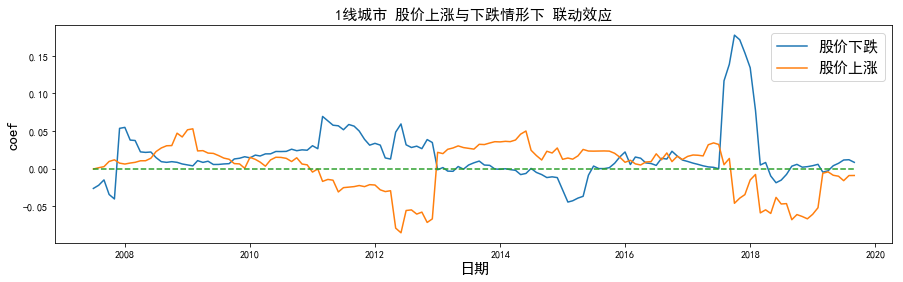

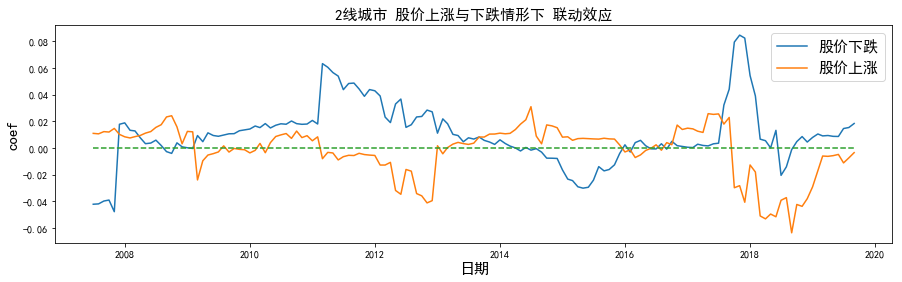

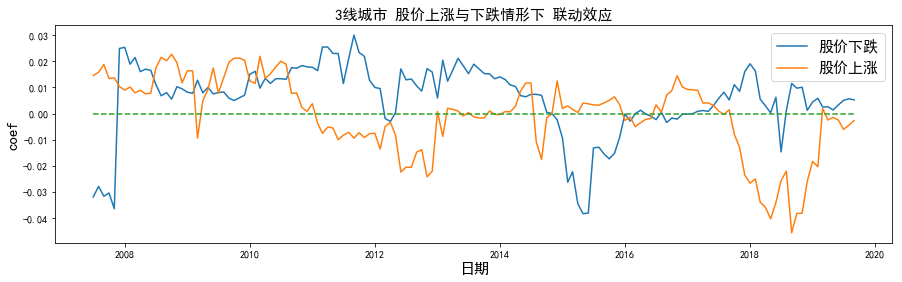

In [873]:
fontsize = 15
size = (15,4)
xlabel = '日期'
ylabel = 'coef'
title = '123线城市 OLS 股价变动 增加与减少 非对称系数对比'

for tier in [1,2,3]:
    plt.figure(figsize=size)
    OLS1 = pd.read_csv('WindowOLS3\'_Type%s.csv'%(str(tier)),index_col=0,parse_dates=['StartDate','EndDate','Date'])
    plt.plot(OLS1['EndDate'],OLS1['szgrowth(-1)'])
    plt.plot(OLS1['EndDate'],OLS1['szgrowth(-1)+']+OLS1['szgrowth(-1)'])
    plt.plot(OLS1['EndDate'],[0 for i in OLS1['szgrowth(-1)']],ls='--')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.ylabel(ylabel,fontsize=fontsize)
    plt.legend(['股价下跌','股价上涨'],fontsize=fontsize)
    plt.title('%s线城市 股价上涨与下跌情形下 联动效应'%(tier),fontsize=fontsize)
    plt.show()

**非对称回归，解释**  

1.滞后一期股价上涨时，即sp%(-1)>0，主要表现为负联动效应：  
>sp%(-1) ↓ 股价涨得少，hp% ↑；  
>sp%(-1) ↑ 股价涨得多，hp% ↓；  

2.滞后一期股价下跌时，即sp%(-1)<0，主要表现为正联动效应；  
>sp%(-1) ↓ 股价涨得少，hp% ↓；  
>sp%(-1) ↑ 股价涨得多，hp% ↑；  

# 实证总结

In [ ]:
划分123线城市  
房价肯定有区别，但房价涨幅不一定  
数据的表现上有区别 - 涨幅相关性、累积涨幅

**1.研究股价与房价变动的联系，使用SVAR模型初探联动关系；**  
>1）使用SVAR可以考虑房价变动与股价变动之间，同期的、滞后期的、双向的联动关系；  
>2）滚动回归可以探究变量间的动态联动关系；  
>3）以窗口的中点作为日历标签，既不滞后、也不超前，对回归结果中发现的突发变动事件的时点把握更加准确；  

**2.分别对一二三线城市进行滚动SVAR后发现：**  

>**是否存在联动效应？**  
>1）滞后一期的股价变动与当期房价变动的联动关系较为显著；  
>2）上述联动关系A在1线城市的显著时间长于23线城市，23线城市的显著联动关系主要集中在2011年以前，而1线城市的显著联动关系在各时段均有分布；  
>3）滞后一期的房价变动与股价变动没有显著的联动关系，从时间先后上看，这个联动关系是单向的：股价%(-1)→房价%；  

>**联动效应是怎样的？**  
>1）从回归系数分布看，123线城市的大部分系数均为正值，即123线城市的滞后一期股价变动与当期房价变动的联动关系是正向的；  
>2）联动关系可以表述为：若股价增长率更高，随后一期的房价增长率也更高；  
>3）正向的联动关系较为接近财富效应理论，股价上涨带来的财富增长或许使人们有更高的欲望购买新房，反之则不会；  
>4）这一正向联动关系在2017年末至2018年初，出现了较高值而后陡然下降甚至变为负值，该现象在12线城市较为明显（why？）； 

**3.由于只有单向的联动关系，改变估计模型为普通的单回归方程的形式，以LS估计：**  
>1）hp% = c + b1*sp%(-1) + b2*hp%(-1)；  
>2）估计结果与SVAR结果相近，b1的分布大部分均为正值，联动关系（b1）最为显著的是1线城市，23线城市均只在2012/13年以前存在显著联动关系；  
>3）直接对比123线城市，联动效应的基本变动方向是一致的，除2012年附近，1线城市的正向联动效应均是最大的；  
>4）2017年效应高点陡转以后很明显不存在财富效应可以解释的正向联动效应，123线非常一致，直到近期重新才反转为正向联动效应；  
>5）这个正联动效应的在2017年的陡转，于123线城市依次增强（why？）；  

~~**4.是否存在股价变动与房价变动之间的非对称正向联动效应？**~~  
~~>如：股价增长越高，随后的房价增长越高，程度为k1；股价增长越低，随后的房价增长越低，程度为k2，k1≠k2?~~  
~~>如：股价上涨的前提下，联动效应如何？下跌前提下，联动效应如何？~~

~~**5.如何引入利率、利差变量？**~~

**6.难点：**  
难以很全面地考虑影响因素（其他宏观因素，利率、利差、增长、通胀、汇率）得到比较精确的估计，即便有，其他变量在研究的系统内大概率也是内生的；

**7.针对实证提出的亟需解决的问题**  
>1)为什么是正的联动效应？  
>2)联动效应的程度不断变化，说明什么，什么原因？  
>3)为什么2017年正联动效应反转？  
>4)123线城市的联动效应对比表明1线城市大部分时段的正联动效应最强，3线最弱，为什么？  
>5)滞后一期股价变动的增或者减对当期房价变动的增或者减影响的强弱是一样的吗？  

**8.特别提出**  
>1)我们发现的正联动效应与财富效应的解释并不匹配，财富效应是股市上涨，财富增值，买房需求增加，推动房市上涨  
>2)直接研究房价和股价的关系是很难的（可以提出来，研究房价和股价的第一步就遇到困难）



**关键结论**  
>1.长期来看，股市与房市的联动效应是存在的，表现在价格变动上，是住房金融属性的一种表现。  
>2.在短期内，联动效应会变动、反转、消失，近期（2019年以来）房市与股市的联动效应不明显。  
>3.房市与股市的联动效应主要是正联动效应，即房价变动与股价变动是同向的。  
>4.股房联动效应在123线城市的变动是相似的，联动效应在1线城市最显著，在3线城市较弱。

# 理论部分要点
1.中国股市、房市介绍，特点、区别与联系；  
>文字+图or数据  
>点出一二三线房市的不同，数据说明？  

2.股市与房市联动效应  
>各类效应 - 图+叙述+列表总结  

3.住房的金融属性（与后续实证相对应）使得出现股房联动，叙述+数据  

4.？

# 股价房价变动对比

In [879]:
# 读取股票月度数据
szData = pd.read_csv('szzz_m.csv')
szData['date_str'] = szData['交易日期↓'].apply(lambda x: x[:7]+'-01')
szData['date'] = szData['date_str'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
szData['Ret'] = szData['涨跌幅(%)']/100
szData['close'] = szData['收盘点位'].apply(lambda x: float(x.replace(',','')))
hpszDataTier = hpDataTier.merge(szData[['date','Ret','close',]],on=['date'])

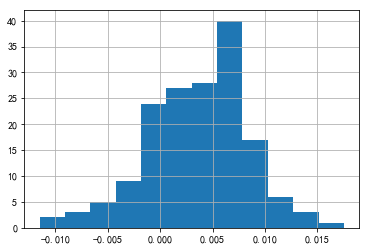

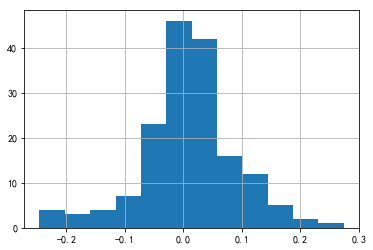

,Ret,销售价格变动
count,165.000000,165.000000
mean,0.009012,0.003675
std,0.082473,0.004815
min,-0.246300,-0.011516
25%,-0.027800,0.000452
50%,0.007400,0.004000
75%,0.050900,0.006710
max,0.274500,0.017548


In [812]:
# 房价股价变动分布图
hpszDataTierSub['销售价格变动'].hist(bins=12)
plt.show()
hpszDataTierSub['Ret'].hist(bins=12)
plt.show()
hpszDataTierSub[['Ret','销售价格变动']].describe()

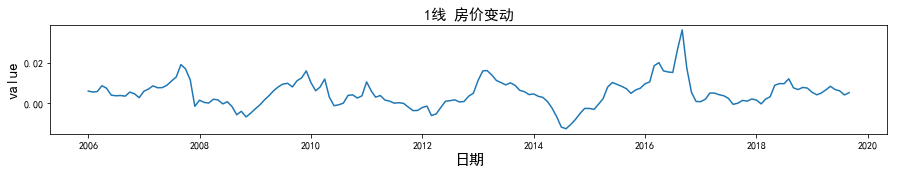

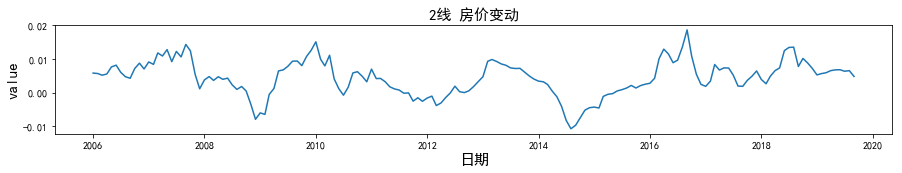

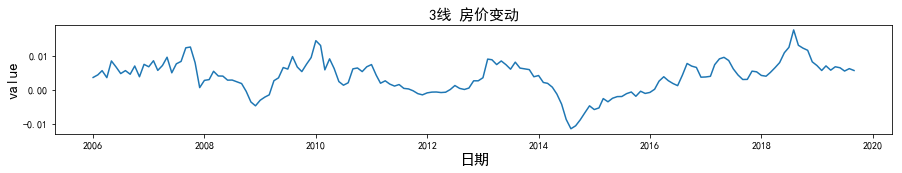

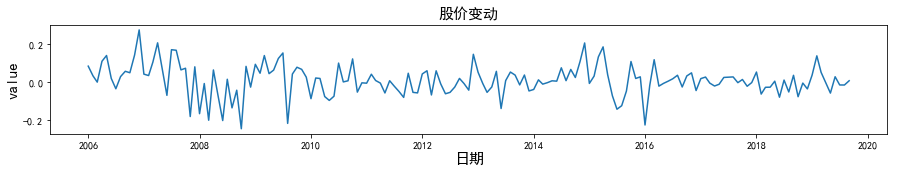

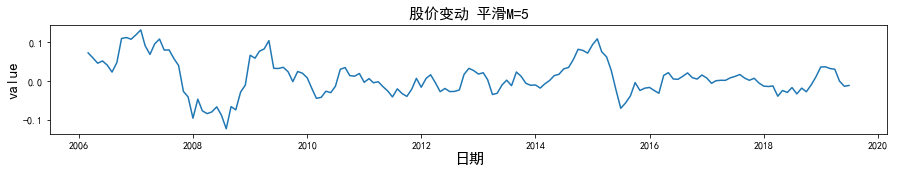

In [838]:
# 股价变动与房价变动联系
tier = 1
for tier in [1,2,3]:
    hpszDataTierSub = hpszDataTier[hpszDataTier['类别123']==tier].copy()
    PlotF((15,2),hpszDataTierSub['date'],hpszDataTierSub['销售价格变动'],15,'日期','value','%s线 房价变动'%(tier))
PlotF((15,2),hpszDataTierSub['date'],hpszDataTierSub['Ret'],15,'日期','value','股价变动')
PlotF((15,2),hpszDataTierSub['date'],hpszDataTierSub['Ret'].rolling(5).mean().shift(-2),15,'日期','value','股价变动 平滑M=5')

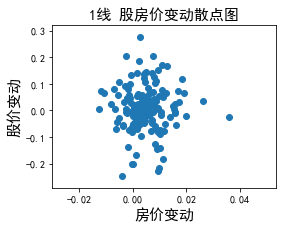

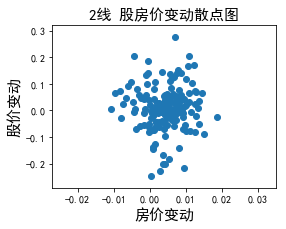

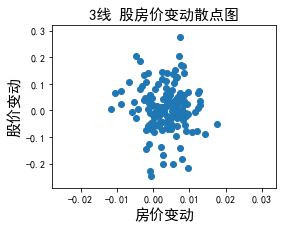

In [892]:
# 股价变动与房价变动散点图 - 没有明显关系
for tier in [1,2,3]:
    hpszDataTierSub = hpszDataTier[hpszDataTier['类别123']==tier].copy()
    ScatterF((4,3),hpszDataTierSub['销售价格变动'],hpszDataTierSub['Ret'].shift(0),15,'房价变动','股价变动','%s线 股房价变动散点图'%(tier))
#     ScatterF((4,3),hpszDataTierSub['销售价格变动'],hpszDataTierSub['Ret'].shift(-1),15,'房价变动','股价变动','%s线 股房价变动散点图'%(tier))
#     ScatterF((4,3),hpszDataTierSub['销售价格变动'],hpszDataTierSub['Ret'].shift(1),15,'房价变动','股价变动','%s线 股房价变动散点图'%(tier))

# 股价房价变动频率关系 - 置于前半部分

In [730]:
# 历史股价变动与未来房价变动联系 - 类似条件概率 - 同向关系主要由同涨贡献？是因为房价总是在涨！
for tier in [1,2,3]:
    hpszDataTierSub = hpszDataTier[hpszDataTier['类别123']==tier].copy()
    hpszDataTierSub['Next销售价格变动'] = hpszDataTierSub['销售价格变动'].shift(-1)
    UpUp = hpszDataTierSub[hpszDataTierSub['Ret']>0].apply(lambda x: 1 if (x['Next销售价格变动']>0) else 0, axis=1).mean()
    DnDn = hpszDataTierSub[hpszDataTierSub['Ret']<0].apply(lambda x: 1 if (x['Next销售价格变动']<0) else 0, axis=1).mean()
    print('%s线 下期房价涨|股价涨:%.4f 下期房价跌|股价跌:%.4f'%(tier,UpUp,DnDn))
print('\n')
for tier in [1,2,3]:
    hpszDataTierSub = hpszDataTier[hpszDataTier['类别123']==tier].copy()
    k = 3
    hpszDataTierSub['Next销售价格变动'] = hpszDataTierSub['销售价格变动'].shift(-1)
    hpszDataTierSub['未来%s累积销售价格变动'%(k)] = np.log(hpszDataTierSub['Next销售价格变动']+1).rolling(k).sum().apply(lambda x: np.exp(x))-1
    UpUp = hpszDataTierSub[hpszDataTierSub['Ret']>0].apply(lambda x: 1 if (x['未来%s累积销售价格变动'%(k)]>0) else 0, axis=1).mean()
    DnDn = hpszDataTierSub[hpszDataTierSub['Ret']<0].apply(lambda x: 1 if (x['未来%s累积销售价格变动'%(k)]<0) else 0, axis=1).mean()
    print('%s线 下%s期房价累积涨|股价涨:%.4f 下%s期房价累积跌|股价跌:%.4f'%(tier,k,UpUp,k,DnDn))
print('\n')

1线 下期房价涨|股价涨:0.7717 下期房价跌|股价跌:0.2055
2线 下期房价涨|股价涨:0.7935 下期房价跌|股价跌:0.1781
3线 下期房价涨|股价涨:0.7500 下期房价跌|股价跌:0.1781


1线 下3期房价累积涨|股价涨:0.7609 下3期房价累积跌|股价跌:0.1507
2线 下3期房价累积涨|股价涨:0.7500 下3期房价累积跌|股价跌:0.1096
3线 下3期房价累积涨|股价涨:0.7174 下3期房价累积跌|股价跌:0.1644




In [ ]:
for tier in [1,2,3]:
    hpszDataTierSub = hpszDataTier[hpszDataTier['类别123']==tier].copy()
    hpszDataTierSub['Next销售价格变动'] = hpszDataTierSub['销售价格变动'].shift(-1)
    UpUp = hpszDataTierSub[hpszDataTierSub['Ret']>0.05].apply(lambda x: 1 if (x['Next销售价格变动']>0.007) else 0, axis=1).mean()
    DnDn = hpszDataTierSub[hpszDataTierSub['Ret']<-0.05].apply(lambda x: 1 if (x['Next销售价格变动']<-0) else 0, axis=1).mean()
    print('%s线 下期房价大涨|股价大涨:%.4f 下期房价跌|股价大跌:%.4f'%(tier,UpUp,DnDn))